House Pricing Prediction - Part One | Exploratory Data Analysis | Handling Missing Data | Categorical Features Encoding

This first notebook contains the first steps to solve the <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/leaderboard">**House Prediction Challenge**</a>, as introduced in the **Kaggle Competition**.



The Dataset is split into a training set and a test set.  The training set consists of **1,460 houses** and **81 features**.

We will showcase an exhaustive **Exploratory Data Analysis (EDA)** to get prior insights in the dataset, determine the data types of each attribute and if the dataset presents **missing data** (and its percentage). 

Consequently, we will device a strategy to impute missing data. A common approach is to plot the attribute distribution and ask if there is a clever way to fill the non-value cells, if it is not, then we will conduct different optimization techniques to fill this gap. Before executing the imputing technique, it is strongly suggested to remove any outlier in order to remove any noise in the distribution that may affect the data filling process.

Once we get a complete tidy dataset, we will proceed to find the most relevant features, by leveraging correlation analysis and other approaches. 

From the remaining features, maybe there are a subset of them represented as a numerical variable that could be represented as a categories. If said attributes do exist, then we will convert them to categories using an integer representation or one-hot encoding.





**Kaggle Dataset Feature Description:** <br>
**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict. <br>
**MSSubClass:** The building class <br>
**MSZoning:** The general zoning classification                          <br>
**LotFrontage:** Linear feet of street connected to property <br>
**LotArea:** Lot size in square feet <br>
**Street:** Type of road access <br>
**Alley:** Type of alley access <br>
**LotShape:** General shape of property <br>
**LandContour:** Flatness of the property <br>
**Utilities:** Type of utilities available <br>
**LotConfig:** Lot configuration <br>
**LandSlope:** Slope of property <br>
**Neighborhood:** Physical locations within Ames city limits <br>
**Condition1:** Proximity to main road or railroad <br>
**Condition2:** Proximity to main road or railroad (if a second is present) <br>
**BldgType:** Type of dwelling <br>
**HouseStyle:** Style of dwelling <br>
**OverallQual:** Overall material and finish quality <br>
**OverallCond:** Overall condition rating <br>
**YearBuilt:** Original construction date <br>
**YearRemodAdd:** Remodel date <br>
**RoofStyle:** Type of roof <br>
**RoofMatl:** Roof material <br>
**Exterior1st**: Exterior covering on house <br>
**Exterior2nd**: Exterior covering on house (if more than one material) <br>
**MasVnrType:** Masonry veneer type <br>
**MasVnrArea:** Masonry veneer area in square feet <br>
**ExterQual:** Exterior material quality <br>
**ExterCond:** Present condition of the material on the exterior <br>
**Foundation:** Type of foundation <br>
**BsmtQual:** Height of the basement <br>
**BsmtCond:** General condition of the basement <br>
**BsmtExposure:** Walkout or garden level basement walls <br>
**BsmtFinType1:** Quality of basement finished area <br>
**BsmtFinSF1:** Type 1 finished square feet <br>
**BsmtFinType2:** Quality of second finished area (if present) <br>
**BsmtFinSF2:** Type 2 finished square feet <br>
**BsmtUnfSF:** Unfinished square feet of basement area <br>
**TotalBsmtSF**: Total square feet of basement area <br>
**Heating:** Type of heating <br>
**HeatingQC:** Heating quality and condition <br>
**CentralAir:** Central air conditioning <br>
**Electrical:** Electrical system <br>
**1stFlrSF:** First Floor square feet <br>
**2ndFlrSF:** Second floor square feet <br>
**LowQualFinSF:** Low quality finished square feet (all floors) <br>
**GrLivArea:** Above grade (ground) living area square feet <br>
**BsmtFullBath:** Basement full bathrooms <br>
**BsmtHalfBath:** Basement half bathrooms <br>
**FullBath:** Full bathrooms above grade <br>
**HalfBath:** Half baths above grade <br>
**Bedroom:** Number of bedrooms above basement level <br>
**Kitchen:** Number of kitchens <br>
**KitchenQual:** Kitchen quality <br>
**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms) <br>
**Functional:** Home functionality rating <br>
**Fireplaces:** Number of fireplaces <br>
**FireplaceQu**: Fireplace quality <br>
**GarageType:** Garage location <br>
**GarageYrBlt**: Year garage was built <br>
**GarageFinish:** Interior finish of the garage <br>
**GarageCars:** Size of garage in car capacity <br>
**GarageArea:** Size of garage in square feet <br>
**GarageQual:** Garage quality <br>
**GarageCond:** Garage condition <br>
**PavedDrive:** Paved driveway <br>
**WoodDeckSF:** Wood deck area in square feet <br>
**OpenPorchSF**: Open porch area in square feet <br>
**EnclosedPorch:** Enclosed porch area in square feet <br>
**3SsnPorch:** Three season porch area in square feet <br>
**ScreenPorch**: Screen porch area in square feet <br>
**PoolArea**: Pool area in square feet <br>
**PoolQC:** Pool quality <br>
**Fence:** Fence quality <br>
**MiscFeature:** Miscellaneous feature not covered in other categories <br>
**MiscVal:** $Value of miscellaneous feature <br>
**MoSold:** Month Sold <br>
**YrSold:** Year Sold <br>
**SaleType**: Type of sale <br>
**SaleCondition:** Condition of sale <br>

Libraries

In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgbm

import numpy as np

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import KFold
import matplotlib.colors as mcolors
import matplotlib

c:\Users\kevin\miniconda3\envs\hackerrank\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
black = mcolors.CSS4_COLORS["black"]
lime = mcolors.CSS4_COLORS["lime"]
aqua = mcolors.CSS4_COLORS["aqua"]
magenta = mcolors.CSS4_COLORS["magenta"]
red = mcolors.CSS4_COLORS["red"]

# Import the datasets

In [3]:
df = pd.read_csv("./data/train.csv")
df.head()
num_obs, num_feats = df.shape
df_test = pd.read_csv("./data/test.csv")

# Exploratory Data Analysis (EDA)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(f"unique feature datatypes : \n {df.dtypes.value_counts()}")

unique feature datatypes : 
 object     43
int64      35
float64     3
Name: count, dtype: int64


It appears that half the features are categorical

In [7]:
cols_missing_data_count = df.isnull().sum()
cols_missing_data = cols_missing_data_count.loc[cols_missing_data_count.values > 0].sort_values(ascending=False)
print(f"Df missing data : \n {cols_missing_data}")

Df missing data : 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [8]:
df[cols_missing_data.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
MasVnrType       object
FireplaceQu      object
LotFrontage     float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtExposure     object
BsmtFinType2     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrArea      float64
Electrical       object
dtype: object

In [9]:
percentage_missing_data = (cols_missing_data / num_obs ) * 100
print(f"Percentage DF missing data : \n {percentage_missing_data}")

Percentage DF missing data : 
 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [10]:
print(f"Number of attributes with missing data: {percentage_missing_data.count()}")

Number of attributes with missing data: 19


In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handling Missing Data

As seen before, we have 19 features with missing values. We will categorize each feature into a group depending on its percentage level.
The first group consists of 4 features [ **PoolQC, MiscFeature, Alley, Fence**] with > 80% of missing data.
The second group consists of 2 features [ **MasVnrType, FireplaceQu**] containing roughly 50% of missing data.
The third group consists of 13 features  containing less than 20% of missing data.

Let's inspect each group to device a strategy to handle their missing data.

In [12]:
#Categorical columns
df.select_dtypes(["object"]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### First group

Feature: PoolQC -> Pool Quality. Category Missing data percentage : 99.5 %.

In [13]:
#extract rows where pool quality is zero, analyze the result to see if tehre is a pattern
df.loc[df["PoolQC"].isnull(), ["PoolArea"]].sum()


PoolArea    0
dtype: int64

In [14]:
df["PoolArea"].loc[df["PoolArea"] > 0.0].count()

np.int64(7)

Conclusion: The previous analysis helped us to find that a NaN value for PoolQC corresponds to the default value from the extracted database. A null PoolQC value matches a corresponding PoolArea of 0.0, thus, we conclude that these cases denote that this property **does not include a pool**. 

With 99.52% of missing data it is safe to remove from the dataset both **PoolQC and PoolArea**

In [15]:
cols_to_remove = ["PoolQC","PoolArea"]

Feature: MiscFeature -> Miscelanious features. Category Missing data percentage : 96.3 %.

In [16]:
df["MiscFeature"].describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

In [17]:
df["MiscFeature"].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

Correlation analysis MiscFeature with house pricing 

In [18]:
misc_feat_enc = LabelEncoder().fit_transform(df["MiscFeature"])
print(f"Misc Feature stats : {np.unique(misc_feat_enc,return_counts=True)}")
df_temp = pd.DataFrame({
    "MiscFeatureEnc" : misc_feat_enc
})

Misc Feature stats : (array([0, 1, 2, 3, 4]), array([   2,    2,   49,    1, 1406]))


<Axes: >

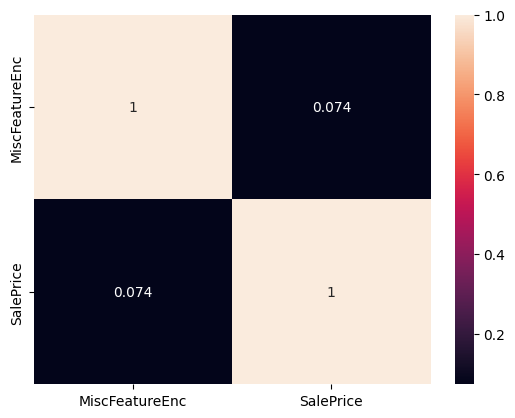

In [19]:
sns.heatmap(data=pd.concat([df_temp,df["SalePrice"]],axis=1).corr(),annot=True)

Conclusion: This feature implicates the presence of aggregated features that may be useful for the prediction, encoded as a categorical variable. Thus, any house that lefts this cell empty means that it did not include any extra information (default null in database). The previous correlation analysis highlights that this feature has nearly zero correlation with House Sales Prices, probably adding this feature to the data modeling will not contribute to a better house price prediciton. We omit this feature.

In [20]:
cols_to_remove.append("MiscFeature")

Feature: Alley. Category Missing data percentage : 93.7 %.
Assumption: Null value means that the property does not possess alley

In [21]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

Correlation analysis Alley with house pricing 

In [22]:
misc_alley_enc = LabelEncoder().fit_transform(df["Alley"])
print(f"Alley stats : {np.unique(misc_alley_enc,return_counts=True)}")
df_temp = pd.DataFrame({
    "AlleyEnc" : misc_alley_enc
})

Alley stats : (array([0, 1, 2]), array([  50,   41, 1369]))


<Axes: >

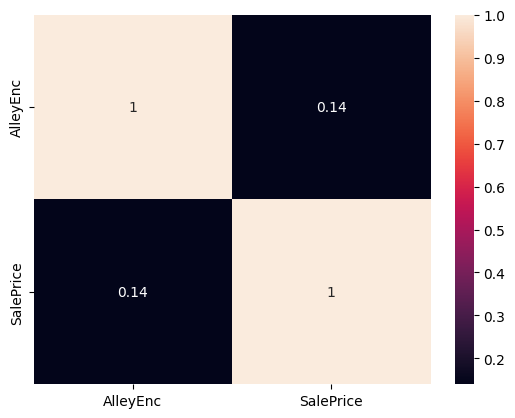

In [23]:
sns.heatmap(data=pd.concat([df_temp,df["SalePrice"]],axis=1).corr(),annot=True)

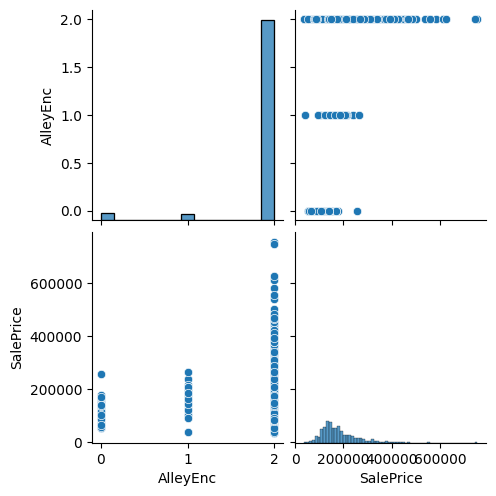

In [24]:
sns.pairplot(data=pd.concat([df_temp,df["SalePrice"]]))

Conclusion: In the lowest range of house prices, from 0 to rougly 300k, seems that price increase is independent of Alley type. Looking at the distribution of SalesPrice Data, it exhibits a normal distribution with mean around 150k, therefore the house with prices > 300K are the minority, the "No Alley" category from this range and upward may not contribute to effectively predicting the house prices in this dataset. We discard this feature for the House Pricing Predictor.

In [25]:
cols_to_remove.append("Alley")

Feature: Fence -> Fence Quality. Category Missing data percentage : 80.75 %.
Assumption: Null value means that the property does not possess Fence

In [26]:
df["Fence"].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

Correlation analysis Fence with house pricing 

In [27]:
misc_fence_enc = LabelEncoder().fit_transform(df["Fence"])
print(f"Fence stats : {np.unique(misc_fence_enc,return_counts=True)}")
df_temp = pd.DataFrame({
    "FenceEnc" : misc_fence_enc
})

Fence stats : (array([0, 1, 2, 3, 4]), array([  59,   54,  157,   11, 1179]))


<Axes: >

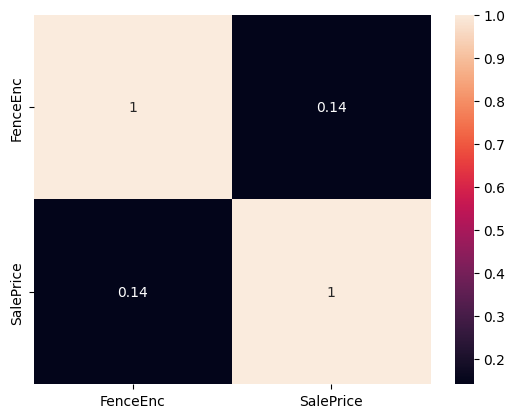

In [28]:
sns.heatmap(data=pd.concat([df_temp,df["SalePrice"]],axis=1).corr(),annot=True)

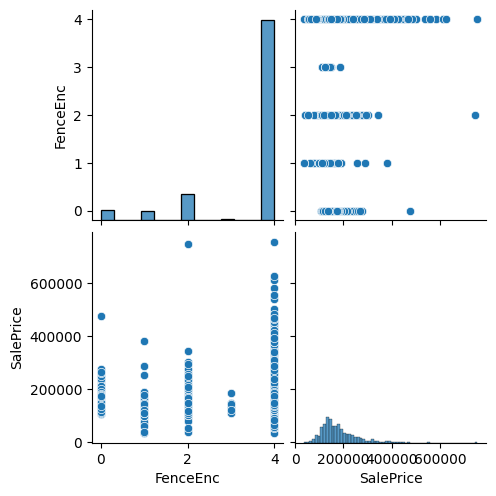

In [29]:
sns.pairplot(data=pd.concat([df_temp,df["SalePrice"]]))

For a stronger analysis, let's preserve FenceEnc values that lies within the Interquartile Range of SalePrice normal distribution

In [30]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [31]:
df_saleprice_ir = df["SalePrice"][(df["SalePrice"] >= 129975) & (df["SalePrice"] <= 214000)]
df_fence_enc_ir = df_temp.iloc[df_saleprice_ir.index]

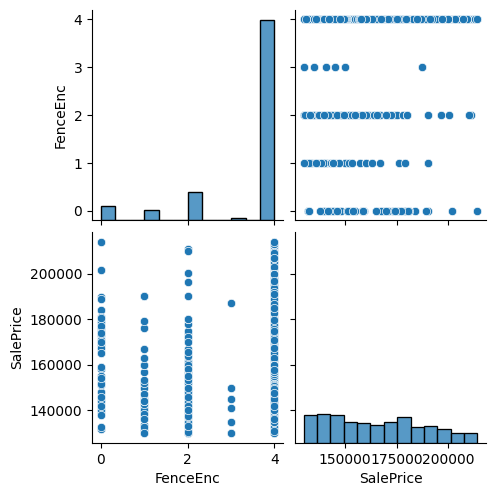

In [32]:

sns.pairplot(data=pd.concat([df_fence_enc_ir,df_saleprice_ir]))


Previous plot shows the distribution of **Fence** variable datapoints with respect to the distribution of the interquartile **SalePrice** variable. There are 3 categories from Fence that their data intervals superpose with each other as the SalePrice range increases, therefore, it would be extremely odd that this feature provides any prediction capability to the model. We chose to discard this feature.

In [33]:
cols_to_remove.append("Fence")

### Second group

Feature: MasVnrType -> Masonry veneer type. Category. Missing data percentage : 59.72 %.

In [34]:
df.loc[df["MasVnrType"].isnull(), ["MasVnrArea"]]

,MasVnrArea
1,0.0
3,0.0
5,0.0
8,0.0
9,0.0
...,...
1454,0.0
1455,0.0
1457,0.0
1458,0.0


In [35]:
#extract rows where MasVnrType is zero, analyze the result with MasVnrArea to see if tehre is a pattern
df.loc[df["MasVnrType"].isnull(), ["MasVnrArea"]].value_counts()

MasVnrArea
0.0           859
1.0             2
288.0           1
312.0           1
344.0           1
Name: count, dtype: int64

Conclusion: MasVnrType contains **872** NaN values. If we match the rows where this feature equals Nan and extract feature **MasVnrArea**, which is the area of masonry, we get **859** data points with an area of masonry equals 0.0. It is safe to assume that a NaN value means that the corresponding house was not built using masonry crafting techniques. We will assign this Nan value a category for the feature.

In [36]:
df["MasVnrType"].fillna("NoMasonry",inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_35888\3666314799.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MasVnrType"].fillna("NoMasonry",inplace=True)


Feature: FireplaceQu -> Fireplace quality. Category. Missing data percentage : 47.26 %.

In [37]:
#extract rows where FireplaceQu is zero, analyze the result with Fireplaces to see if tehre is a pattern
df.loc[df["FireplaceQu"].isnull(), ["Fireplaces"]].value_counts()

Fireplaces
0             690
Name: count, dtype: int64

Evidently, Nan Values in FireplaceQu means the house does not has fireplaces. We fill Nan values accordingly. *Check in the feature selection step for possible colinearity between these two features.*

In [38]:
df["FireplaceQu"].fillna("NoFireplace",inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_35888\4222465852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FireplaceQu"].fillna("NoFireplace",inplace=True)


### Third group

Features : Garage* . Categorical variables. Number of garage variables with missing data: 5. Missing data percentage per variable: 5.54 %.

In [39]:
df[["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]].isnull().any(axis=1).value_counts()

False    1379
True       81
Name: count, dtype: int64

In [40]:
miss_data_garage = df[["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]].isnull()
miss_data_garage.loc[miss_data_garage["GarageType"] == True].all(axis=1).all()

np.True_

Evidently, these 5 features identically matches their corresponding missing value rows with each other.
Let us investigate further to conclude if this Nan value means the house lacks garage zone.

In [41]:
df.loc[miss_data_garage.loc[miss_data_garage["GarageType"] == True].index,["GarageCars", "GarageArea"]].value_counts()

GarageCars  GarageArea
0           0             81
Name: count, dtype: int64

Conclusion: It is obvious that the missing data from the Garage categorical columns correspond with garage cars and area with area of zero, this means that these houses does not include garage. We fill these Nan values with NoGarage category

In [42]:
values = {
    "GarageType" : "NoGarage","GarageFinish" : "NoGarage","GarageQual" : "NoGarage","GarageCond" : "NoGarage",
    "GarageYrBlt" : 0.0
}
df.fillna(values,inplace=True)

Features : Bsmt* . Categorical variables. Number of Basement variables with missing data: 5. Missing data percentage per variable: 2.6, 2.53 %.

In [43]:
indices_missing_data_bmst = df.loc[df[["BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond", "BsmtFinType1"]].isnull().any(axis=1).values].index

In [44]:
df.loc[indices_missing_data_bmst,["BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond", "BsmtFinType1", "TotalBsmtSF", "BsmtUnfSF",
"BsmtFullBath", "BsmtHalfBath"]]

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,BsmtUnfSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0
332,No,NaN,Gd,TA,GLQ,3206,1603,1,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0


Conclusion: From previous table we can visualize that most of the missing values are matched with a basement area or unfinished basement area of zero, thus it is clear that for these cases, NaN means the dataset does not possess basement.

For row 332, feature Basement finished type 2 has a NaN value, based on the description of the competence, it states that this feature may not apply, therefore it is reasonable to assume that NaN means that this house does not have a second basement area.

For row 948, feature Basement Exposure has a NaN value, since it is a single house, we deciced to discard this feature from the dataset.

In [45]:
values = {
    "BsmtExposure" : "NoBasement", "BsmtFinType2" : "NoBasement", "BsmtQual" : "NoBasement", "BsmtCond" : "NoBasement" , 
    "BsmtFinType1" : "NoBasement"
}
df.fillna(values,inplace=True)
df.drop([948], axis=0,inplace=True)

Feature: Electrical -> Electrical System. Category. Missing data percentage : 0.06 %.

Conclusion: Single row has an electrical value of Nan. We discard this house from dataset.

In [46]:
df.drop([1379], axis=0,inplace=True)

Feature: LotFrontage -> Linear feet of street connected to property. Numeric. Missing data percentage : 17.73 %. <br>
Number missing data: 259

In [47]:
df["LotFrontage"].describe()

count    1199.000000
mean       70.051710
std        24.304427
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

C:\Users\kevin\AppData\Local\Temp\ipykernel_35888\3997232959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["LotFrontage"], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})


Text(160, 0.002, 'Possible outliers')

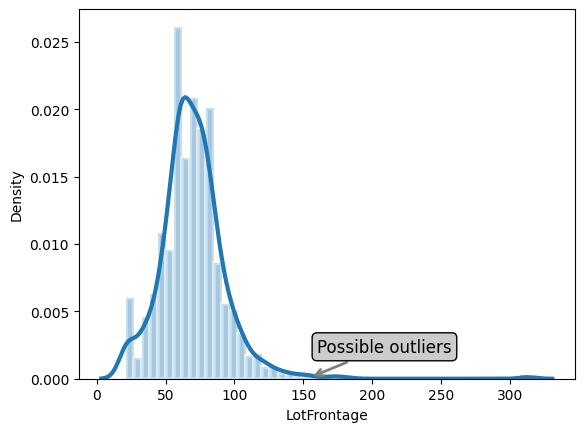

In [48]:
ax = sns.distplot(df["LotFrontage"], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
ax.annotate('Possible outliers', xy=(155, 0.00010), xytext=(160, 0.0020), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))


Previous plot clearly shows that our dataset distribution is normal, after removing outliers we are imputting missing data using the mean of the distribution.

Text(0.1, 10, 'Outliers')

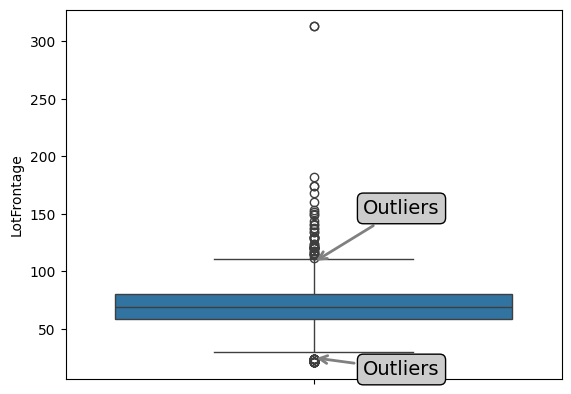

In [49]:
ax = sns.boxplot(df["LotFrontage"])

# notation indicating an outlier
ax.annotate('Outliers', xy=(0,108), xytext=(0.1,150), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

ax.annotate('Outliers', xy=(0,25), xytext=(0.1,10), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))




From previous analysis, we have found that LotFrontage has outliers from the upper and lower boundary of range. Thus we proceed to check the number of rows containing this values and depending on the size of it with respect to the dataset size, we will decide if it is convenient to remove these rows from the data.

In [89]:
lot_frontage_outliers = df["LotFrontage"][(df["LotFrontage"] >= 108.0) | (df["LotFrontage"] <= 25.0)]
print(f"LotFrontage feature : number of rows with outlier feature data  -> {lot_frontage_outliers.count()}")

LotFrontage feature : number of rows with outlier feature data  -> 100


In [51]:
lot_frontage_outliers_2 = df["LotFrontage"][(df["LotFrontage"] >= 150.0) | (df["LotFrontage"] <= 20.0)]
print(f"LotFrontage feature : number of rows with outlier feature data  -> {lot_frontage_outliers_2.count()}")

LotFrontage feature : number of rows with outlier feature data  -> 10


In [52]:
avg_correlated_feats_vals_when_lotfrontage_nan = df.iloc[df["LotFrontage"].isnull().values][["OverallQual","1stFlrSF","LotArea"]].mean()
avg_correlated_feats_vals_when_lotfrontage_nan

OverallQual        5.992278
1stFlrSF        1182.050193
LotArea        13137.370656
dtype: float64

Text(80, 0.008, 'Most freq val')

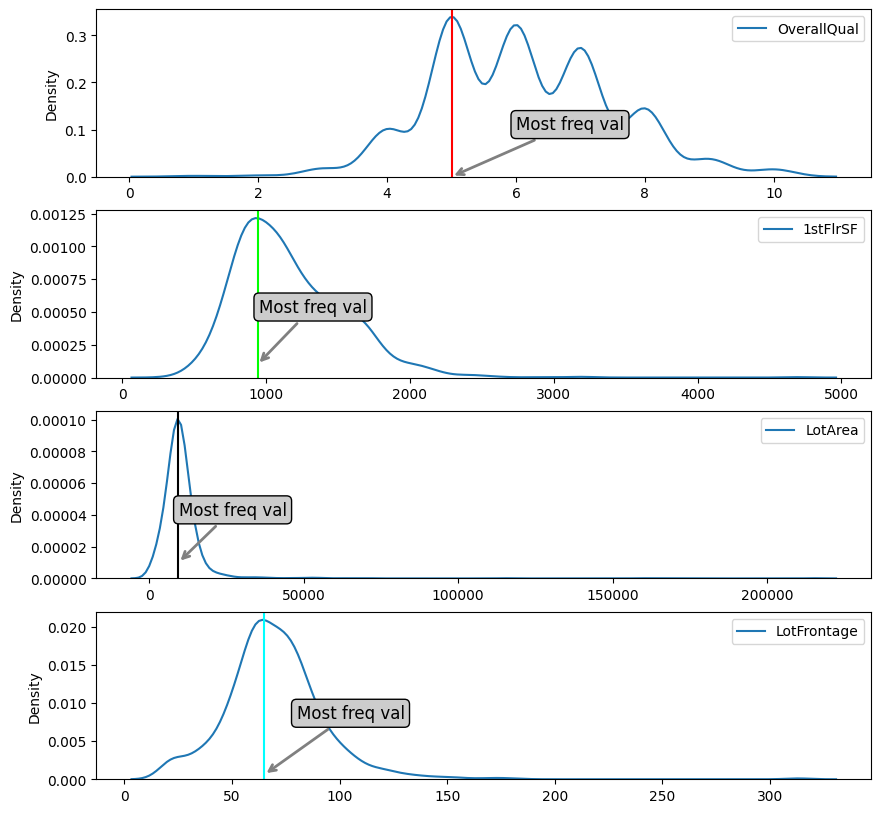

In [53]:
fig,axes = plt.subplots(4,1,figsize=(10,10))
sns.kdeplot(df[["OverallQual"]],ax=axes[0])
axes[0].axvline(x = 5,    # Line on x = 2
        ymin = 0, # Bottom of the plot
           ymax = 1,color=red)
axes[0].annotate('Most freq val', xy=(5, 0.00010), xytext=(6,0.1), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
sns.kdeplot(df[["1stFlrSF"]],ax=axes[1])
axes[1].axvline(x = 940,    # Line on x = 2
        ymin = 0, # Bottom of the plot
           ymax = 1,color=lime)
axes[1].annotate('Most freq val', xy=(940, 0.00010), xytext=(950,0.0005), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
#--------
sns.kdeplot(df[["LotArea"]],ax=axes[2])
axes[2].axvline(x = 9500,    # Line on x = 2
        ymin = 0, # Bottom of the plot
           ymax = 1,color=black)
axes[2].annotate('Most freq val', xy=(9500, 0.000010), xytext=(9550,0.00004), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
sns.kdeplot(df[["LotFrontage"]],ax=axes[3])
axes[3].axvline(x = 65,    # Line on x = 2
        ymin = 0, # Bottom of the plot
           ymax = 1,color=aqua)
axes[3].annotate('Most freq val', xy=(65, 0.00060), xytext=(80,0.008), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))

Analysis LotFrontage: We have obtained the subset of rows when this feature has NaNs and extracted the values for the most correlated features to it.
Approximately, we can see how the average of these features lies within the peaks of their normal data distribution. Thus, we assume the NaNs for LotFrontage follows these patterns, meaning that they are probably located within the highest concentration of data points per feature. We are going to impute missing data utilizing the mean of the normal distribution (without outliers).

In [54]:

values = {
    "LotFrontage" : df["LotFrontage"][((df["LotFrontage"] >= 25.0) & df["LotFrontage"] <= 108.0)].mean(),
}
df.fillna(values,inplace=True)

Feature: MasVnrArea -> Masonry veneer area in square feet. Numeric. Missing data percentage : 0.54 %. <br>
Number missing data: 8

C:\Users\kevin\AppData\Local\Temp\ipykernel_35888\104838219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["MasVnrArea"], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})


Text(585, 0.002, 'Possible outliers')

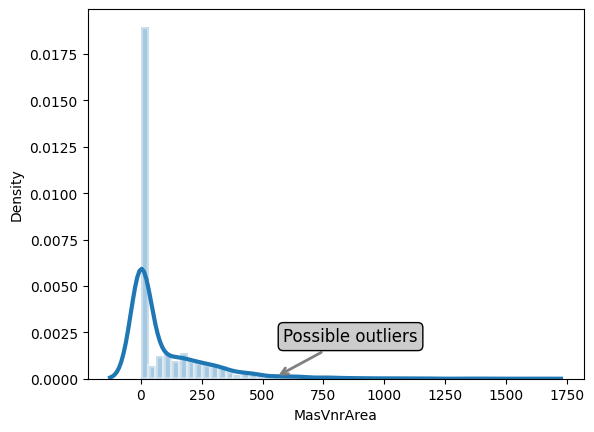

In [55]:
ax = sns.distplot(df["MasVnrArea"], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
ax.annotate('Possible outliers', xy=(555, 0.00010), xytext=(585, 0.0020), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))

Most of the distribution is normal, with some discrepancies in the right end of the graph.

Decision: Since most of the data follows a normal distribution, we decided to impute the mean of this normal distribution, trimming misbehaving values. 

Text(0.1, 430, 'Outliers')

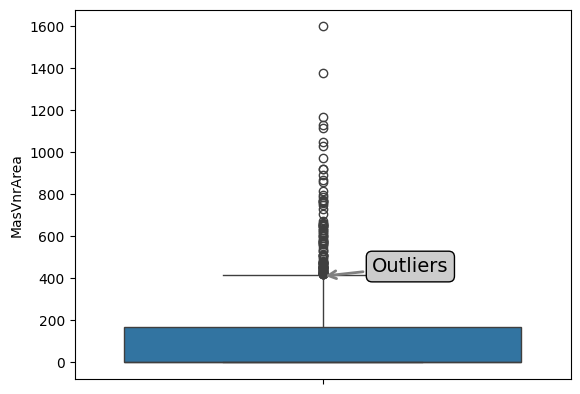

In [56]:
ax = sns.boxplot(df["MasVnrArea"])

# notation indicating an outlier
ax.annotate('Outliers', xy=(0,410), xytext=(0.1,430), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

In [57]:
outliers_mas_vnr_area = df["MasVnrArea"].loc[df["MasVnrArea"] > 410]

In [58]:
outliers_mas_vnr_area_2 = df["MasVnrArea"].loc[df["MasVnrArea"] > 555]

In [59]:
print(f"MasVnrArea feature : number of rows with outlier feature data  -> {outliers_mas_vnr_area.count()}")

MasVnrArea feature : number of rows with outlier feature data  -> 98


In [60]:
avg_correlated_feats_vals_when_masvnrarea_nan = df.iloc[df["MasVnrArea"].isnull().values][["OverallQual"]].mean()
avg_correlated_feats_vals_when_masvnrarea_nan

OverallQual    7.25
dtype: float64

Text(5, 0.002, 'Most freq val')

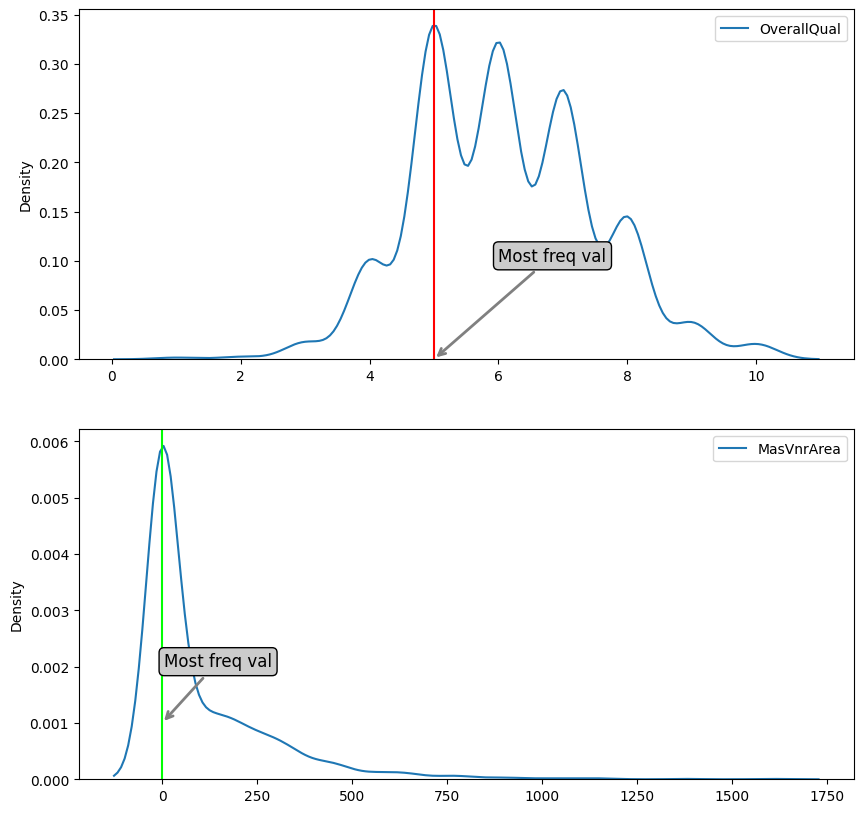

In [61]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
sns.kdeplot(df[["OverallQual"]],ax=axes[0])
axes[0].axvline(x = 5,    # Line on x = 2
        ymin = 0, # Bottom of the plot
           ymax = 1,color=red)
axes[0].annotate('Most freq val', xy=(5, 0.00010), xytext=(6,0.1), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
sns.kdeplot(df[["MasVnrArea"]],ax=axes[1])
axes[1].axvline(x = 0,    # Line on x = 2
        ymin = 0, # Bottom of the plot
           ymax = 1,color=lime)
axes[1].annotate('Most freq val', xy=(0, 0.0010), xytext=(5,0.002), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))


Analysis: Most correlated feature for MasVnrArea is OverallQual, the average value of this feature when MasVnrArea presents NaN values is 7.25, which is slightly skewed to the right from the most frequent Overall value (5), probably has to do because MasVnrArea is not a perfectly symmetrical normal distribution. We can expect the real missing values to be slightly skewed right from 0 (most freq value for MasVnrArea). To simplify this problem, we will impute the missing NaN values with the mean of MasVnrArea distribution (without outliers)

In [62]:
values = {
    "MasVnrArea" : df["MasVnrArea"][((df["MasVnrArea"] <= 410.0))].mean(),
}
df.fillna(values,inplace=True)

Let us check how many we will be removing if we discard outliers from LotFrontage and Masonry Veneer Area

In [63]:

print(f"MasVnrArea feature : number of rows with outlier feature data  -> {outliers_mas_vnr_area_2.count()}")

MasVnrArea feature : number of rows with outlier feature data  -> 49


In [64]:
merge_outliers_df = pd.merge(left=lot_frontage_outliers,right=outliers_mas_vnr_area,how="outer",
                             left_on= lot_frontage_outliers.index,right_on = outliers_mas_vnr_area.index)


In [65]:
merge_outliers_2_df = pd.merge(left=lot_frontage_outliers_2,right=outliers_mas_vnr_area_2,how="outer",
                             left_on= lot_frontage_outliers_2.index,right_on = outliers_mas_vnr_area_2.index)

In [66]:
merge_outliers_df

,key_0,LotFrontage,MasVnrArea
0,25,110.0,640.0
1,35,108.0,NaN
2,36,112.0,NaN
3,37,NaN,650.0
4,41,115.0,NaN
...,...,...,...
181,1420,NaN,420.0
182,1426,NaN,448.0
183,1437,NaN,426.0
184,1447,NaN,438.0


In [67]:
(186 / num_obs) * 100

12.73972602739726

We have 186 rows we will need to discard in order to remove outliers from LotFrontage and MasVnrArea, consistituing 12.73 % of current data. We will be left out with 1272 observations to work with. We opted to removed these rows from the dataset and we will preserve an image of the complete dataset for comparison purposes.

In [68]:
df1 = df.copy()
df1.drop(merge_outliers_df.key_0.values,axis= 0, inplace=True)
df1.count()

Id               1272
MSSubClass       1272
MSZoning         1272
LotFrontage      1272
LotArea          1272
                 ... 
MoSold           1272
YrSold           1272
SaleType         1272
SaleCondition    1272
SalePrice        1272
Length: 81, dtype: int64

In [69]:
df1_1 = df.copy()
df1_1.drop(merge_outliers_2_df.key_0.values,axis= 0, inplace=True)

Let's fill the missing values from these two features (LotFrontage & MasVnrArea) with their corresponding mean value

In [70]:
""" values = {
    "LotFrontage" : df["LotFrontage"].mean(),
    "MasVnrArea" : df["MasVnrArea"].mean()
}
df.fillna(values,inplace=True)

values = {
    "LotFrontage" : df1["LotFrontage"].mean(),
    "MasVnrArea" : df1["MasVnrArea"].mean()
}
df1.fillna(values,inplace=True) """

' values = {\n    "LotFrontage" : df["LotFrontage"].mean(),\n    "MasVnrArea" : df["MasVnrArea"].mean()\n}\ndf.fillna(values,inplace=True)\n\nvalues = {\n    "LotFrontage" : df1["LotFrontage"].mean(),\n    "MasVnrArea" : df1["MasVnrArea"].mean()\n}\ndf1.fillna(values,inplace=True) '

In [71]:
""" values = {
    "LotFrontage" : df1_1["LotFrontage"].mean(),
    "MasVnrArea" : df1_1["MasVnrArea"].mean()
}
df1_1.fillna(values,inplace=True) """

' values = {\n    "LotFrontage" : df1_1["LotFrontage"].mean(),\n    "MasVnrArea" : df1_1["MasVnrArea"].mean()\n}\ndf1_1.fillna(values,inplace=True) '

In [72]:
df.isnull().sum().values

array([   0,    0,    0,    0,    0,    0, 1367,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1451, 1177, 1404,    0,    0,
          0,    0,    0,    0])

In [73]:
df1.isnull().sum().values

array([   0,    0,    0,    0,    0,    0, 1191,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1268, 1008, 1222,    0,    0,
          0,    0,    0,    0])

In [74]:
df1_1.isnull().sum().values

array([   0,    0,    0,    0,    0,    0, 1313,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1396, 1124, 1346,    0,    0,
          0,    0,    0,    0])

Let us drop the previously analyzed features that may not contribute to predict house prices

In [75]:
df.drop(cols_to_remove,axis=1,inplace=True)
df1.drop(cols_to_remove,axis=1,inplace=True)

In [76]:
df1_1.drop(cols_to_remove,axis=1,inplace=True)

In [77]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
df1.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
df1_1.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Categorical Features Encoding

This section aims to convert string categorical features into a data type which can be processed by ML models. Note: If required, analyze the features who may be best encoded as ordinal encoding.

Update 15/08/2024: Now we have applied ordinal feature encoding to the relevant features.

In [80]:
df.reset_index(drop=True,inplace=True)
df.drop(["Id"], axis=1,inplace=True)
df1.reset_index(drop=True,inplace=True)
df1.drop(["Id"], axis=1,inplace=True)

In [81]:

df1_1.reset_index(drop=True,inplace=True)

df1_1.drop(["Id"], axis=1,inplace=True)

In [82]:
df.select_dtypes(["object"]).columns.values

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [83]:
ordinal_cols_ordered = ["LotShape", "Utilities", "LandSlope", "HeatingQC"]
ordinal_cols_unordered = ["HouseStyle", "ExterQual", "ExterCond","BsmtQual", "BsmtCond", "BsmtExposure",
"BsmtFinType1", "BsmtFinType2","Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
"GarageCond" ]

In [84]:
df2 = df.copy()
new_feat_col_names = []

for col_name in df.select_dtypes(["object"]).drop(ordinal_cols_ordered + ordinal_cols_unordered,axis = 1).columns.values:
    new_feat_name = col_name + "_enc"
    x = LabelEncoder().fit_transform(df2[col_name])
    temp_serie = pd.Series(x,name=new_feat_name)
    df2 = pd.concat([df2,temp_serie],axis=1)
    df2.drop([col_name],axis = 1,inplace=True)
    new_feat_col_names.append(new_feat_name)

#Ordinal categorical encoding (ordered values)

for col_name in df[ordinal_cols_ordered].columns.values:
    feat = df2[col_name]
    cat_len = feat.unique().shape[0]

    #construct dict of values to be replaced
    temp_dic = {}
    for i,val in enumerate(feat.unique()):
        temp_dic[val] = cat_len - i

    #replace dict of values in col features
    temp_serie = feat.replace(temp_dic)
    temp_serie.name = col_name + "_enc"
    df2 = pd.concat([df2,temp_serie],axis=1)
    df2.drop([col_name],axis = 1,inplace=True)
    new_feat_col_names.append(temp_serie.name)


#Ordinal categorical encoding (unordered values)
ls_replace_vals_ord_cat_unordered = [
{ "1Story" : 1,"1.5Fin" : 2, "1.5Unf" : 3, "2Story" : 4, "2.5Fin" : 5, "2.5Unf" : 6, "SFoyer" : 7,
                        "SLvl" : 8
},#ord_cat_unordered_hs
{"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1} , #ord_cat_unordered_eq
{"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1}, #ord_cat_unordered_ec
 {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1, "NoBasement" : 0}, #ord_cat_unordered_bq
{"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1, "NoBasement" : 0}, #ord_cat_unordered_bc
{"Gd" : 4, "Av" : 3, "Mn" : 2, "No" : 1, "NoBasement" : 0}, #ord_cat_unordered_be
{"GLQ" : 6 , "ALQ" : 5, "BLQ" : 4, "Rec" : 3, "LwQ" : 2, "Unf" : 1, "NoBasement" : 0}, #ord_cat_unordered_bft1
{"GLQ" : 6 , "ALQ" : 5, "BLQ" : 4, "Rec" : 3, "LwQ" : 2, "Unf" : 1, "NoBasement" : 0}, #ord_cat_unordered_bft2
 {"SBrkr" : 5, "FuseA" : 4, "FuseF" : 3, "FuseP" : 2, "Mix" : 1}, #ord_cat_unordered_e
{"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1}, #ord_cat_unordered_kq
 {"Typ" : 7, "Min1" : 6, "Min2" : 5, "Mod" : 4, "Maj1" : 3, "Maj2" : 2, "Sev" : 1}, #ord_cat_unordered_f
{'Ex': 5, 'Gd' : 4, 'TA' : 3, "Fa" : 2, 'Po' : 1, 'NoFireplace' : 0}, #ord_cat_unordered_fq
 {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NoGarage' : 0}, #ord_cat_unordered_gf
 {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1, "NoGarage" : 0}, #ord_cat_unordered_gq
 {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa" : 2, "Po" : 1, "NoGarage" : 0} #ord_cat_unordered_gc
]

for i,col_name in enumerate(df[ordinal_cols_unordered].columns.values):

    #replace dict of values in col features
    temp_serie = df2[col_name].replace(ls_replace_vals_ord_cat_unordered[i])
    temp_serie.name = col_name + "_enc"
    df2 = pd.concat([df2,temp_serie],axis=1)
    df2.drop([col_name],axis = 1,inplace=True)
    new_feat_col_names.append(temp_serie.name)


int_float_features = df2.columns.drop(new_feat_col_names).tolist()
df2 = df2[new_feat_col_names + int_float_features]

#--------------------------
df3 = df1.copy()

new_feat_col_names = []

for col_name in df1.select_dtypes(["object"]).columns.values:
    new_feat_name = col_name + "_enc"
    x = LabelEncoder().fit_transform(df1[col_name])
    temp_serie = pd.Series(x,name=new_feat_name)
    df3 = pd.concat([df3,temp_serie],axis=1)
    df3.drop([col_name],axis = 1,inplace=True)
    new_feat_col_names.append(new_feat_name)


int_float_features = df3.columns.drop(new_feat_col_names).tolist()
df3 = df3[new_feat_col_names + int_float_features]



C:\Users\kevin\AppData\Local\Temp\ipykernel_35888\700817693.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_serie = feat.replace(temp_dic)
C:\Users\kevin\AppData\Local\Temp\ipykernel_35888\700817693.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_serie = feat.replace(temp_dic)
C:\Users\kevin\AppData\Local\Temp\ipykernel_35888\700817693.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

Dataframe without outliers

In [90]:
df2_wo_outliers = df2.copy()
print(f"df2 wo outliers obs  : {df2_wo_outliers.shape[0]}")
df2_wo_outliers.drop(lot_frontage_outliers.index,axis=0,inplace=True)

df2_wo_outliers.drop(outliers_mas_vnr_area.index,axis=0,inplace=True)

df2 wo outliers obs  : 1458


In [93]:
df2_wo_outliers.reset_index(drop=True,inplace=True)

In [85]:
df3_1 = df1_1.copy()


new_feat_col_names = []

for col_name in df1_1.select_dtypes(["object"]).columns.values:
    new_feat_name = col_name + "_enc"
    x = LabelEncoder().fit_transform(df1_1[col_name])
    temp_serie = pd.Series(x,name=new_feat_name)
    df3_1 = pd.concat([df3_1,temp_serie],axis=1)
    df3_1.drop([col_name],axis = 1,inplace=True)
    new_feat_col_names.append(new_feat_name)


float_features = df3_1.columns.drop(new_feat_col_names).tolist()
df3_1 = df3_1[new_feat_col_names + float_features]



# Saving Dataframes to JSON Files

For the last section of this notebook, we will save the processed dataframes DF2 and DF3, in an upcoming notebook we are going to assess if our outlier detection and filtering step yields better results, the best trained model will be set as baseline for comparison purposes and its training dataset will be kept for in depth feature selection and model experimentation.

In [94]:
save_path = "./data/outlier-exclusion/"
df2_wo_outliers.to_json(save_path + "dataset-wo-outliers-new-ord-enc.json",orient="columns")
#df3.to_json(save_path + "dataset-wo-outliers.json",orient="columns")
#df3_1.to_json(save_path + "dataset-wo-outliers_2.json",orient="columns")